In [25]:
import numpy as np
import corner
import scipy.stats
import matplotlib.pyplot as plt

In [28]:
#Storing the Sampled beta values. beta 10, Beta 11r and beta11i
burnin = 7000
file_path = '/home/vaishali/Desktop/inferred_beta_pol/first_pol_bl_smica/accepted_m1M_pol_param_run1_bl_smica.dat'
file_path1 = '/home/vaishali/Desktop/inferred_beta_pol/first_pol_bl_smica/accepted_m1M_pol_hpc_run2_bl_smica.dat'
b_pol1 = np.loadtxt(file_path, skiprows=burnin, usecols=(0,1,3), unpack=True)
b_pol2 = np.loadtxt(file_path1, skiprows=burnin, usecols=(0,1,3), unpack=True)
b_pol = np.concatenate((b_pol1.T, b_pol2.T), axis=0)
b_pol = b_pol.T

In [29]:
b10_pol = b_pol[0,burnin:]
b11r_pol=b_pol[1,burnin:]
b11i_pol=b_pol[2,burnin:]
data = np.array([b10_pol,b11r_pol,b11i_pol])
print(data.shape)

(3, 17140)


In [30]:
hist = np.histogram(b10_pol, bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf10 = hist_dist.pdf(b10_pol)
mode = pdf10.argmax()
b10_pol_mode=b10_pol[mode]

In [31]:
hist = np.histogram(b11r_pol, bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf10 = hist_dist.pdf(b11r_pol)
mode = pdf10.argmax()
b11r_pol_mode=b11r_pol[mode]

In [32]:
hist = np.histogram(b11i_pol, bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf11i = hist_dist.pdf(b11i_pol)
mode = pdf11i.argmax()
b11i_pol_mode=b11i_pol[mode]

In [33]:
flat_samples=np.ndarray(shape=(data.shape[1],3))
flat_samples[:,0]=b10_pol
flat_samples[:,1]=b11r_pol
flat_samples[:,2]=b11i_pol
labels = [r"$\beta_{10}$", r"$\beta_{11r}$", r"$\beta_{b11i}$"]

[4.328654320410371, -0.42402691146195404, -0.9524247017902965]
[ 4.58752691 -0.37916032 -1.13391323]
6.0581798558757445 3.116873969010136


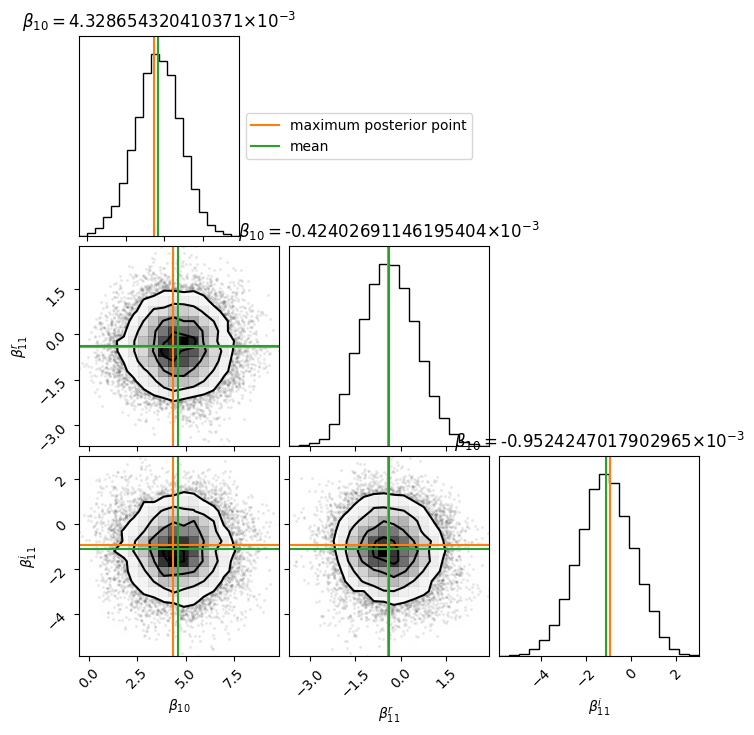

In [34]:
# This is the true mean of the second mode that we used above:
value1 = [b10_pol_mode,b11r_pol_mode,b11i_pol_mode]
print(value1)
# This is the empirical mean of the sample:
mean = np.mean(flat_samples, axis=0)
std_dev = np.std(flat_samples,axis=0)
print(value2)
# Make the base corner plot
figure = corner.corner(flat_samples)
# Extract the axes
axes = np.array(figure.axes).reshape((3,3))
ax = axes[1, 0]
ax.set_ylabel(r'$\beta_{11}^r$')
ax = axes[2, 0]
ax.set_ylabel(r'$\beta_{11}^i$')
ax = axes[2, 0]
ax.set_xlabel(r'$\beta_{10}$')
ax = axes[2,1]
ax.set_xlabel(r'$\beta_{11}^r$')
ax = axes[2,2]
ax.set_xlabel(r'$\beta_{11}^i$')
ax = axes[0, 0]
ax.set_title(r'$\beta_{10} = $'+str(b10_pol_mode)+r'$\times 10^{-3}$')
x1 = mean[0]+std_dev[0]
x2 = mean[0]-std_dev[0]
x3 = mean[0]+2*std_dev[0]
x4 = mean[0]-2*std_dev[0]
ax.axhspan(x1,x2, color='grey', alpha=0.75, lw=0)
ax.axhspan(x3,x4, color='silver', alpha=0.75, lw=0)
print(x1,x2)
ax = axes[1, 1]
ax.set_title(r'$\beta_{10} = $'+str(b11r_pol_mode)+r'$\times 10^{-3}$')
x1 = mean[1]+std_dev[1]
x2 = mean[1]-std_dev[1]
x3 = mean[1]+2*std_dev[1]
x4 = mean[1]-2*std_dev[1]
ax.axhspan(x1,x2, color='orange', alpha=0.75, lw=0)
ax.axhspan(x3,x4, color='orange', alpha=0.75, lw=0)
ax = axes[2, 2]
ax.set_title(r'$\beta_{10} = $'+str(b11i_pol_mode)+r'$\times 10^{-3}$')
x1 = mean[2]+std_dev[2]
x2 = mean[2]-std_dev[2]
x3 = mean[2]+2*std_dev[2]
x4 = mean[2]-2*std_dev[2]
ax.axhspan(x1,x2, color='orange', alpha=0.75, lw=0)
ax.axhspan(x3,x4, color='orange', alpha=0.75, lw=0)

corner.overplot_lines(figure, value1, color="C1",label = 'maximum posterior point')
#corner.overplot_points(figure, value1[None], marker="s", color="C1",label = 'maximum posterior point')
corner.overplot_lines(figure, mean, color="C2",label = 'mean')
ax = axes[0, 0]
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
